In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Scikit-learn modules: For scaling data, applying clustering,
#evaluating the clustering quality.

# Sample data
data = {'Feature1': [5, 10, 15, 20, 25],
        'Feature2': [100, 200, 300, 400, 500]}
df = pd.DataFrame(data)

#Normalize the data: The StandardScaler scales data so that 
#it has a mean of 0 and a standard deviation of 1, 
#making the clustering more effective.
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Evaluate the clusters using silhouette score
silhouette_avg = silhouette_score(normalized_data, clusters)

# Output results
print("Cluster Centers:", kmeans.cluster_centers_)
print("Silhouette Score:", silhouette_avg)
print(df)


NameError: name 'boundaries' is not defined

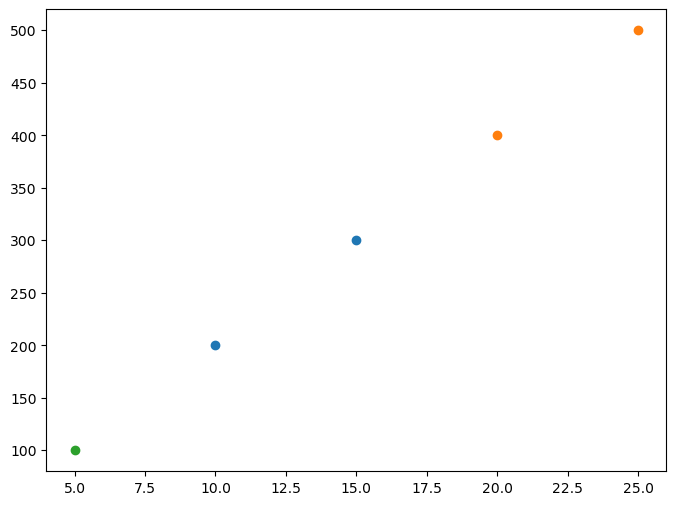

In [16]:
import matplotlib.pyplot as plt

# Plot the odata points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Feature1'], cluster_points['Feature2'], 
                label=f'Cluster {cluster}')

# Lay the centroids (segmentation boundaries)
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=200, c='red', marker='*', label='Centroids')

# Add labels and legend
plt.title('Cluster Segmentation')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True)
plt.show()


     Henkilot  Matkat  Cluster
0         877    3012        2
1         278    5494        0
2        1518    2205        2
3        1315    1713        2
4        1254    3091        2
..        ...     ...      ...
155      7262    4335        3
156      7724    5630        3
157      7908    4904        3
158      7689    4238        3
159      6518    5949        3

[160 rows x 3 columns]
Silhouette Score: 0.4659636401551118
Segmentation Boundaries (Centroids):
      Henkilot       Matkat
0  1218.571429  4605.142857
1  4350.454545  1746.681818
2  1105.166667  1646.650000
3  5736.409091  5051.454545


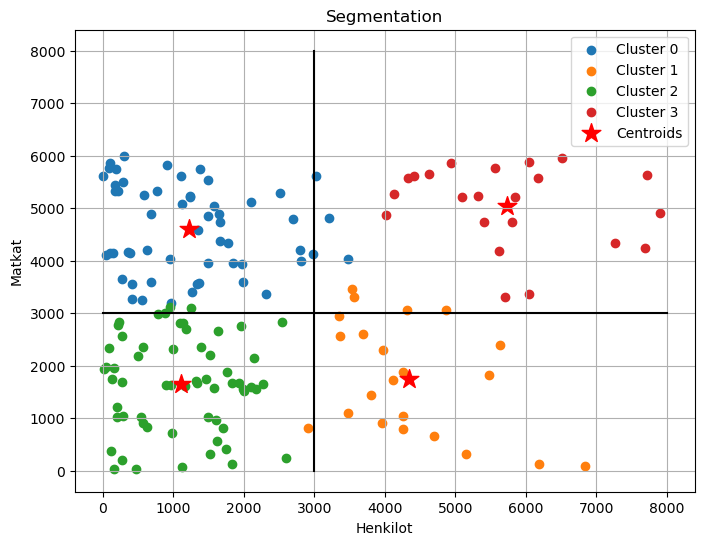

In [216]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import random as r

# Sample data
list1 = []
list2 = []
for x in range (100):  
    list1.append (r.randint(0,2000))
    list2.append (r.randint(0,6000))
for y in range (50): 
    list1.append (r.randint(2000,6000))
    list2.append (r.randint(0,6000))
for i in range (10): 
    list1.append (r.randint(6000,8000))
    list2.append (r.randint(0,6000))
                 

data = {'Henkilot':list1,
        'Matkat':list2 }
df = pd.DataFrame(data)

# Normalise the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Apply K-Means clustering: 

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the dataframe
df['Cluster'] = clusters
print(df)

# Evaluate the clusters by silhouette score. Using silhouette score as a measure to evalute cluster quality,
#where a higher value indicates better-defined clusters.
silhouette_avg = silhouette_score(normalized_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Define segmentation boundaries (=centroids)
centroids = kmeans.cluster_centers_
boundaries = scaler.inverse_transform(centroids)  # this is used to transform centroids back to original scale
print("Segmentation Boundaries (Centroids):")
print(pd.DataFrame(boundaries, columns=['Henkilot', 'Matkat']))


# Visualize the segmentation
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], 
                label=f'Cluster {cluster}')

# Lay the centroids (segmentation boundaries)
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=200, c='red', marker='*', label='Centroids')

# Add labels and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation')
plt.legend()

plt.grid(True)

plt.show()



In [129]:
# Define Max and Min in clusters
# Initialize dictionaries to store max and min values for each cluster
cluster_max = {} #store the max and min for each cluster for easy access and display
cluster_min = {}

# Iterate through each unique cluster
for cluster in df['Cluster'].unique(): ##Retrive all the unique in every cluster 
    cluster_data = df[df['Cluster'] == cluster][['Henkilot', 'Matkat']] #Filters the DataFrame for rows belonging to the current cluster.
    cluster_max[cluster] = cluster_data.max() #Run the maximum for each column (Henkilöt and Matkat) in the cluster's subset.
    cluster_min[cluster] = cluster_data.min() #Run the minimum for each column (Henkilot and Matkat) in the cluster's subset.

# Display the results
for cluster in cluster_max.keys():
    print(f"Cluster {cluster}:")
    print(f"  Max Values:\n{cluster_max[cluster]}")
    print(f"  Min Values:\n{cluster_min[cluster]}\n")


####Miksi klusterit vaihtavat paikkaa kun ajetaan?


########Erikeseen 
plt.plot([3000,3000], [0,8000], color='black')
plt.plot([0000,8000], [3000,3000], color='black')


Cluster 0:
  Max Values:
Henkilot    2977
Matkat      5857
dtype: int64
  Min Values:
Henkilot      33
Matkat      3030
dtype: int64

Cluster 2:
  Max Values:
Henkilot    3041
Matkat      2960
dtype: int64
  Min Values:
Henkilot    38
Matkat      76
dtype: int64

Cluster 3:
  Max Values:
Henkilot    7812
Matkat      2654
dtype: int64
  Min Values:
Henkilot    3399
Matkat        71
dtype: int64

Cluster 1:
  Max Values:
Henkilot    7187
Matkat      5914
dtype: int64
  Min Values:
Henkilot    3468
Matkat      2725
dtype: int64



In [ ]:
plt.plot([3000,3000], [0,8000], color='black')
plt.plot([0000,8000], [3000,3000], color='black')

In [354]:
# Maximum 'Matkat' in Cluster 2 (y-axis)
max_cluster_2_y = df[df['Cluster'] == 2]['Matkat'].max()

# Minimum 'Matkat' in Cluster 0 (y-axis)
min_cluster_0_y = df[df['Cluster'] == 0]['Matkat'].min()

# Maximum 'Henkilot' in Cluster 2 (x-axis)
max_cluster_2_x = df[df['Cluster'] == 2]['Henkilot'].max()

# Minimum 'Henkilot' in Cluster 1 (x-axis)
min_cluster_1_x = df[df['Cluster'] == 1]['Henkilot'].min()


# Print the results
print("Max in Cluster 2 (y-axis, Matkat):", max_cluster_2_y)
print("Min in Cluster 0 (y-axis, Matkat):", min_cluster_0_y)
print("Max in Cluster 2 (x-axis, Henkilot):", max_cluster_2_x)
print("Min in Cluster 1 (x-axis, Henkilot):", min_cluster_0_x)

Max in Cluster 2 (y-axis, Matkat): 3120
Min in Cluster 0 (y-axis, Matkat): 3195
Max in Cluster 2 (x-axis, Henkilot): 2598
Min in Cluster 1 (x-axis, Henkilot): 961


3157.5


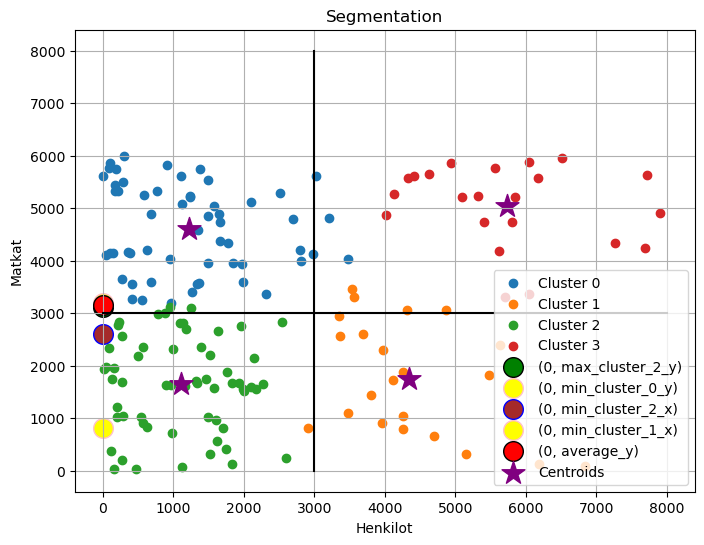

In [462]:
# Define max value for Cluster 2 (y-axis)
max_cluster_2_y = df[df['Cluster'] == 2]['Matkat'].max()

#Define min value for Cluster 0 (y-axis)
min_cluster_0_y = df[df['Cluster'] == 0]['Matkat'].min()

#Define maximum value for Cluster 2 (x-axis)
max_cluster_2_x = df[df['Cluster'] == 2]['Henkilot'].max()

#Define maximum value for Cluster 1 (x-axis)
max_cluster_1_x = df[df['Cluster'] == 2]['Henkilot'].max()


# Calculate average of max_cluster_2_y and min_cluster_0_y
average_y = (max_cluster_2_y + min_cluster_0_y) / 2
print(average_y)

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the clusters
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Highlight the point at (0, max_cluster_2_y)
plt.scatter(0, max_cluster_2_y, 
            color='green', s=200, label='(0, max_cluster_2_y)', edgecolors='black')

# Highlight the point at (0, min_cluster_0_y)
plt.scatter(0, min_cluster_0_y, 
            color='yellow', s=200, label='(0, min_cluster_0_y)', edgecolors='pink')


# Highlight the point at (0, max_cluster_2_x)
plt.scatter(0, max_cluster_2_x, 
            color='brown', s=200, label='(0, min_cluster_2_x)', edgecolors='blue')

# Highlight the point at (0, min_cluster_1_y)
plt.scatter(0, min_cluster_1_y, 
            color='yellow', s=200, label='(0, min_cluster_1_x)', edgecolors='pink')


# Highlight the average point at (0, average_y)
plt.scatter(0, average_y, 
            color='red', s=200, label='(0, average_y)', edgecolors='black')

# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation')
plt.plot([3000,3000], [0,8000], color='black')
plt.plot([0000,8000], [3000,3000], color='black')
plt.legend()
plt.grid(True)


# Display the plot
plt.show()


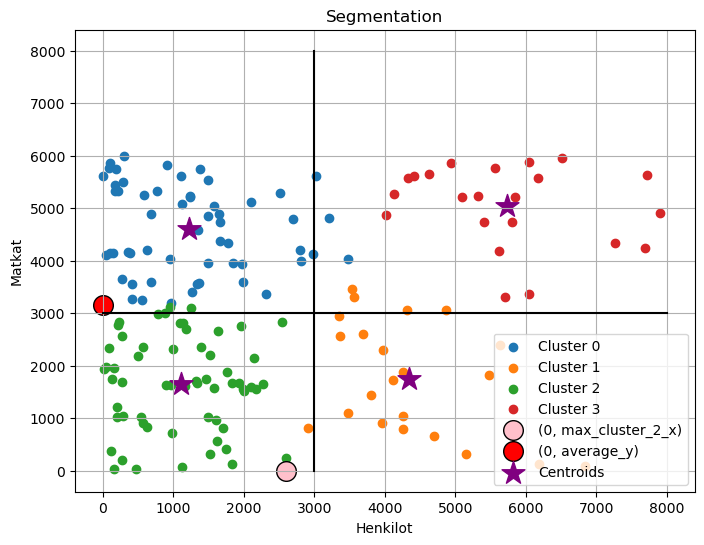

In [398]:
#Define maximum value for Cluster 2 (x-axis)
max_cluster_2_x = df[df['Cluster'] == 2]['Henkilot'].max()

# Calculate average of max_cluster_2_y and min_cluster_0_y
average_y = (max_cluster_2_y + min_cluster_0_y) / 2

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the clusters
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')


# Highlight the point at (0, max_cluster_2_x)
plt.scatter(max_cluster_2_x,0,  
            color='pink', s=200, label='(0, max_cluster_2_x)', edgecolors='black',)


# Highlight the average point at (0, average_y)
plt.scatter(0, average_y, 
            color='red', s=200, label='(0, average_y)', edgecolors='black')

# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation')
plt.plot([3000,3000], [0,8000], color='black')
plt.plot([0000,8000], [3000,3000], color='black')
plt.legend()
plt.grid(True)


# Display the plot
plt.show()


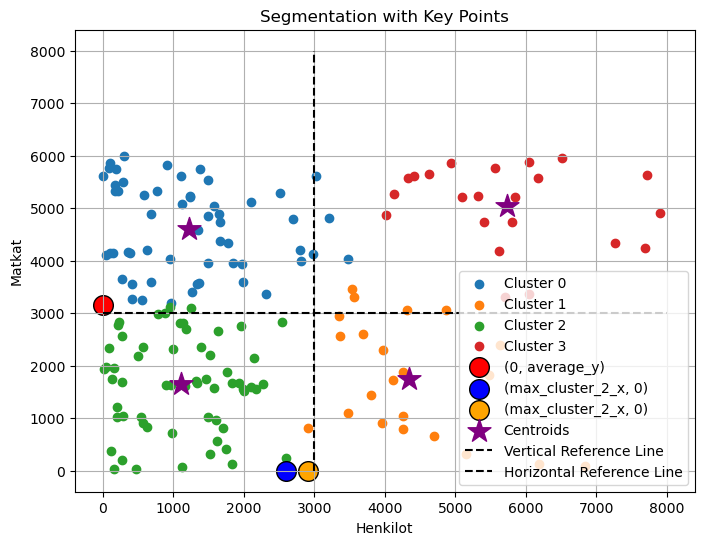

In [400]:
#Minimum 'Henkilot' in Cluster 1 (x-axis)
min_cluster_1_x = df[df['Cluster'] == 1]['Henkilot'].min()


# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')


# Highlight the average point at (0, average_y)
plt.scatter(0, average_y, 
            color='red', s=200, label='(0, average_y)', edgecolors='black')

# Highlight the point at (max_cluster_2_x, 0)
plt.scatter(max_cluster_2_x, 0, 
            color='blue', s=200, label='(max_cluster_2_x, 0)', edgecolors='black')


# Highlight the point at (min_cluster_1_x, 0)
plt.scatter(min_cluster_1_x, 0, 
            color='orange', s=200, label='(max_cluster_2_x, 0)', edgecolors='black')


# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation with Key Points')
plt.plot([3000, 3000], [0, 8000], color='black', linestyle='--', label='Vertical Reference Line')
plt.plot([0, 8000], [3000, 3000], color='black', linestyle='--', label='Horizontal Reference Line')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


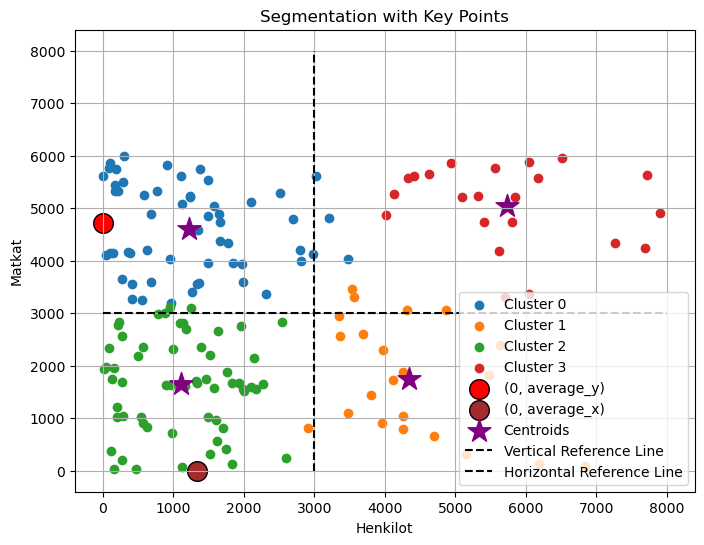

In [584]:
# Calculate average of max_cluster_2_x and min_cluster_1_y
average_x = (max_cluster_2_x + min_cluster_1_x) / 2


# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Highlight the average point at (0, average_y)
plt.scatter(0, average_y, 
            color='red', s=200, label='(0, average_y)', edgecolors='black')

# Highlight the average point at (average_x,0)
plt.scatter(average_x, 0,
            color='brown', s=200, label='(0, average_x)', edgecolors='black')


# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation with Key Points')
plt.plot([3000, 3000], [0, 8000], color='black', linestyle='--', label='Vertical Reference Line')
plt.plot([0, 8000], [3000, 3000], color='black', linestyle='--', label='Horizontal Reference Line')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


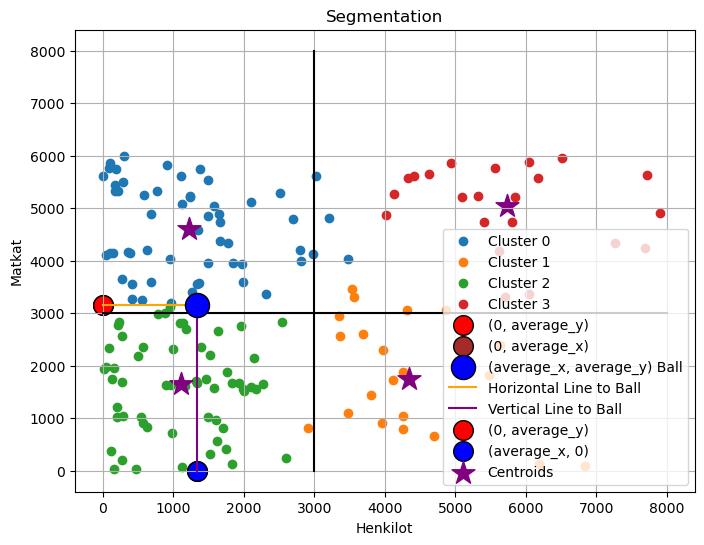

In [468]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Highlight the average point at (0, average_y)
plt.scatter(0, average_y, 
            color='red', s=200, label='(0, average_y)', edgecolors='black')

# Highlight the average point at (average_x,0)
plt.scatter(average_x, 0,
            color='brown', s=200, label='(0, average_x)', edgecolors='black')

# Highlight the average point at (average_x, average_y) as a koordinaatisto
plt.scatter(average_x, average_y, 
            color='blue', s=300, label='(average_x, average_y) Ball', edgecolors='black', zorder=5)

# Draw a line connecting (0, average_y) and (average_x, average_y)
plt.plot([0, average_x], [average_y, average_y], color='orange', linestyle='-', label='Horizontal Line to Ball')

# Draw a line connecting (average_x, 0) and (average_x, average_y)
plt.plot([average_x, average_x], [0, average_y], color='purple', linestyle='-', label='Vertical Line to Ball')

# Draw the points (0, average_y) and (average_x, 0)
plt.scatter(0, average_y, color='red', s=200, label='(0, average_y)', edgecolors='black')
plt.scatter(average_x, 0, color='blue', s=200, label='(average_x, 0)', edgecolors='black')


# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation')
plt.plot([3000, 3000], [0, 8000], color='black')
plt.plot([0, 8000], [3000, 3000], color='black')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [440]:
# Maximum 'Matkat' in Cluster 0 (y-axis)
max_cluster_0_y = df[df['Cluster'] == 0]['Matkat'].max()

# Minimum 'Matkat' in Cluster 3 (y-axis)
min_cluster_3_y = df[df['Cluster'] == 3]['Matkat'].min()

# Maximum 'Matkat' in Cluster 1 (y-axis)
max_cluster_1_y = df[df['Cluster'] == 1]['Matkat'].max()

#Minimum 'Matkat' in Cluster 1 (x-axis)
min_cluster_1_x = df[df['Cluster'] == 1]['Matkat'].min()

# Minimum 'Henkilot' in Cluster 1 (x-axis)
max_cluster_1_x = df[df['Cluster'] == 1]['Henkilot'].min()


# Print the results
print("Max in Cluster 0 (y-axis, Matkat):", max_cluster_0_y)
print("Min in Cluster 3 (y-axis, Matkat):", min_cluster_3_y)
print("Max in Cluster 1 (x-axis, Henkilot):", max_cluster_1_x)
print("Min in Cluster 1 (x-axis, Henkilot):", min_cluster_1_x)

Max in Cluster 0 (y-axis, Matkat): 5996
Min in Cluster 3 (y-axis, Matkat): 3315
Max in Cluster 1 (x-axis, Henkilot): 3463
Min in Cluster 1 (x-axis, Henkilot): 85


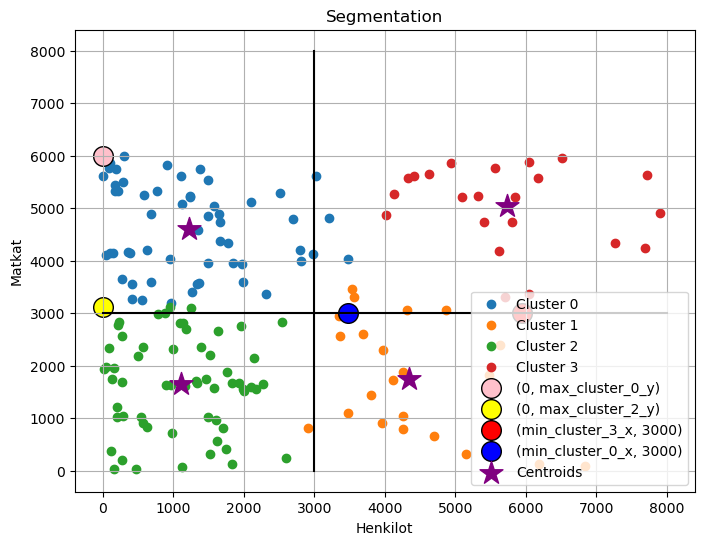

In [630]:
#Define maximum value for Cluster 0 (y-axis)
max_cluster_0_y = df[df['Cluster'] == 0]['Matkat'].max()

#Define Minium value for Cluster 0 (x-axis)
min_cluster_0_x = df[df['Cluster'] == 0]['Henkilot'].max()


#Define Maximum value for Cluster 2 (x-axis)
max_cluster_2_y = df[df['Cluster'] == 2]['Matkat'].max()


#Define Maximum value for Cluster 3 (x-axis)
min_cluster_3_y = df[df['Cluster'] == 3]['Matkat'].max()

#Average of y
average_x = (max_cluster_0_y + min_cluster_0_x) / 2

#Average of y
average_y = (max_cluster_2_y + min_cluster_3_y) / 2




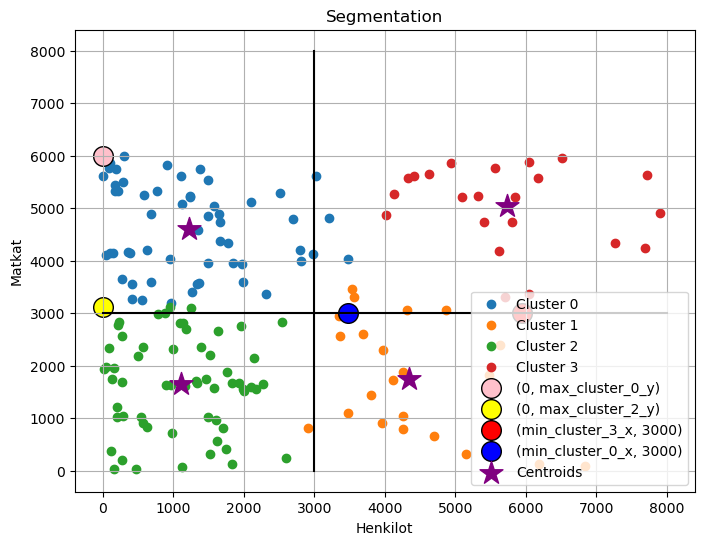

In [632]:
# Plot the clusters

plt.figure(figsize=(8, 6))

for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')


# Highlight the point at (max_cluster_0_y,0)
plt.scatter(0, max_cluster_0_y,  
            color='pink', s=200, label='(0, max_cluster_0_y)', edgecolors='black',)



plt.scatter(0, max_cluster_2_y,  
            color='yellow', s=200, label='(0, max_cluster_2_y)', edgecolors='black',)
plt.scatter(min_cluster_3_y, 3000, color='red', s=200, label='(min_cluster_3_x, 3000)', edgecolors='black')

plt.scatter(min_cluster_0_x, 3000, color='blue', s=200, label='(min_cluster_0_x, 3000)', edgecolors='black')



# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation')
plt.plot([3000,3000], [0,8000], color='black')
plt.plot([0000,8000], [3000,3000], color='black')
plt.legend()
plt.grid(True)


# Display the plot
plt.show()

In [642]:
### Move the highlited points to X and Y axis

## Calculate the average of y 

#Average of y
average_y = (max_cluster_0_y + max_cluster_2_y) / 2

#Average of y
average_y = (min_cluster_3_y + min_cluster_0_x) / 2


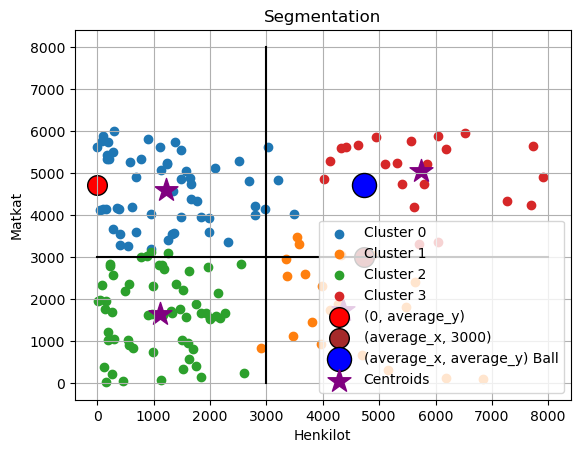

In [638]:
### Move the # Plot the clusters

# Plot the clusters
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Highlight the average point

plt.scatter(0, average_y, 
            color='red', s=200, label='(0, average_y)', edgecolors='black')

plt.scatter(average_x, 3000,
            color='brown', s=200, label='(average_x, 3000)', edgecolors='black')

plt.scatter(average_x, average_y, 
            color='blue', s=300, label='(average_x, average_y) Ball', edgecolors='black', zorder=5)

# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation')
plt.plot([3000,3000], [0,8000], color='black')
plt.plot([0000,8000], [3000,3000], color='black')
plt.legend()
plt.grid(True)


# Display the plot
plt.show()


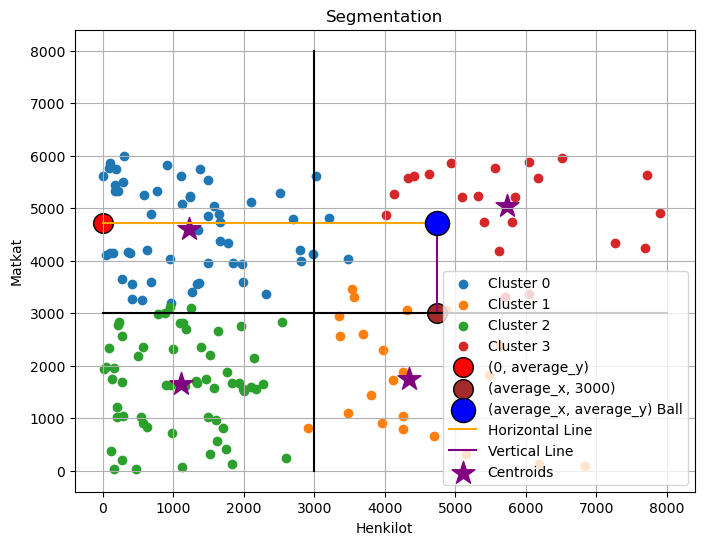

In [564]:

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the clusters
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')


# Highlight the average point

plt.scatter(0, average_y, 
            color='red', s=200, label='(0, average_y)', edgecolors='black')

plt.scatter(average_x, 3000,
            color='brown', s=200, label='(average_x, 3000)', edgecolors='black')

plt.scatter(average_x, average_y, 
            color='blue', s=300, label='(average_x, average_y) Ball', edgecolors='black', zorder=5)


# PLot the horizontal and vertical lines to connect all the highlighted points
plt.plot([0, average_x], [average_y, average_y], color='orange', linestyle='-', label='Horizontal Line')
plt.plot([average_x, average_x], [average_y, 3000], color='purple', linestyle='-', label='Vertical Line')


# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation')
plt.plot([3000,3000], [0,8000], color='black')
plt.plot([0000,8000], [3000,3000], color='black')
plt.legend()
plt.grid(True)


# Display the plot
plt.show()


In [566]:
# Min 'Matkat' in Cluster 1 (y-axis)
min_cluster_1_y = df[df['Cluster'] == 1]['Matkat'].min()

# Maximum 'Henkilot' in Cluster 3 (x-axis)
max_cluster_2_x = df[df['Cluster'] == 3]['Henkilot'].max()

# Maximum 'Matkat' in Cluster 1 (y-axis)
max_cluster_1_y = df[df['Cluster'] == 1]['Matkat'].max()

#Minimum 'Henkilot' in Cluster 3 (x-axis)
min_cluster_3_x = df[df['Cluster'] == 1]['Henkilot'].min()

# Print the results
print("Min in Cluster 1 (y-axis, Matkat):", max_cluster_1_y)
print("Max in Cluster 2 (x-axis, Matkat):", max_cluster_2_y)
print("Max in Cluster 1 (y-axis, Henkilot):", max_cluster_1_y)
print("Min in Cluster 3 (x-axis, Henkilot):", min_cluster_3_x)

Min in Cluster 1 (y-axis, Matkat): 3463
Max in Cluster 2 (x-axis, Matkat): 3120
Max in Cluster 1 (y-axis, Henkilot): 3463
Min in Cluster 3 (x-axis, Henkilot): 2905


/var/folders/k3/h_045xpx5nq83x7tjntnp7c00000gn/T/ipykernel_19154/1745958528.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_cluster_1_y_position = df[df['Cluster'] == 1][df['Matkat'] == min_cluster_1_y]
/var/folders/k3/h_045xpx5nq83x7tjntnp7c00000gn/T/ipykernel_19154/1745958528.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_cluster_2_x_position = df[df['Cluster'] == 2][df['Henkilot'] == max_cluster_2_x]
/var/folders/k3/h_045xpx5nq83x7tjntnp7c00000gn/T/ipykernel_19154/1745958528.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_cluster_1_y_position = df[df['Cluster'] == 1][df['Matkat'] == max_cluster_1_y]
/var/folders/k3/h_045xpx5nq83x7tjntnp7c00000gn/T/ipykernel_19154/1745958528.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_cluster_3_x_position = df[df['Cluster'] == 3][df['Henkilot'] == min_cluster_3_y]


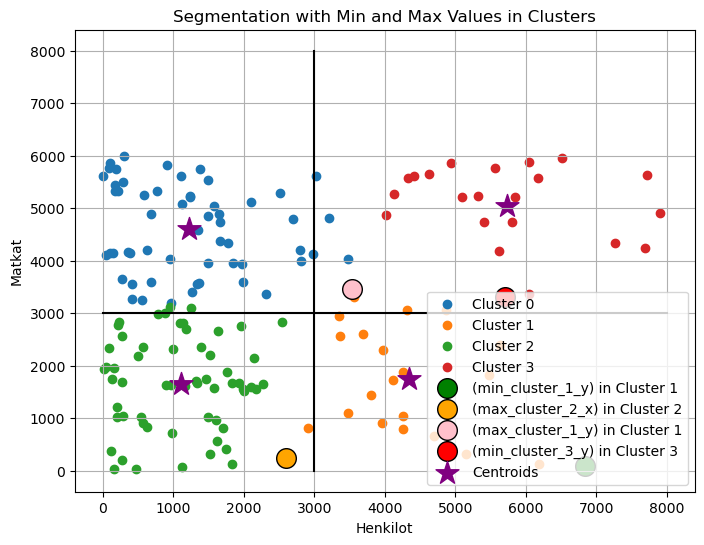

In [652]:
# Define min and max values within each cluster
min_cluster_1_y = df[df['Cluster'] == 1]['Matkat'].min()  # Minimum value in Cluster 1 for Matkat (y-axis)
max_cluster_2_x = df[df['Cluster'] == 2]['Henkilot'].max()  # Maximum value in Cluster 2 for Henkilot (x-axis)
max_cluster_1_y = df[df['Cluster'] == 1]['Matkat'].max()  # Maximum value in Cluster 1 for Matkat (y-axis)
min_cluster_3_x = df[df['Cluster'] == 3]['Henkilot'].min()  # Minimum value in Cluster 3 for Matkat (y-axis)

# Define the positions where the min and max values occur
min_cluster_1_y_position = df[df['Cluster'] == 1][df['Matkat'] == min_cluster_1_y]
max_cluster_2_x_position = df[df['Cluster'] == 2][df['Henkilot'] == max_cluster_2_x]
max_cluster_1_y_position = df[df['Cluster'] == 1][df['Matkat'] == max_cluster_1_y]
min_cluster_3_x_position = df[df['Cluster'] == 3][df['Henkilot'] == min_cluster_3_y]

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the clusters
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Visualize the min and max points within the clusters
plt.scatter(min_cluster_1_y_position['Henkilot'], min_cluster_1_y_position['Matkat'], 
            color='green', s=200, label='(min_cluster_1_y) in Cluster 1', edgecolors='black')

plt.scatter(max_cluster_2_x_position['Henkilot'], max_cluster_2_x_position['Matkat'], 
            color='orange', s=200, label='(max_cluster_2_x) in Cluster 2', edgecolors='black')

plt.scatter(max_cluster_1_y_position['Henkilot'], max_cluster_1_y_position['Matkat'], 
            color='pink', s=200, label='(max_cluster_1_y) in Cluster 1', edgecolors='black')

plt.scatter(min_cluster_3_y_position['Henkilot'], min_cluster_3_y_position['Matkat'], 
            color='red', s=200, label='(min_cluster_3_y) in Cluster 3', edgecolors='black')

# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation with Min and Max Values in Clusters')
plt.plot([3000, 3000], [0, 8000], color='black')
plt.plot([0, 8000], [3000, 3000], color='black')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


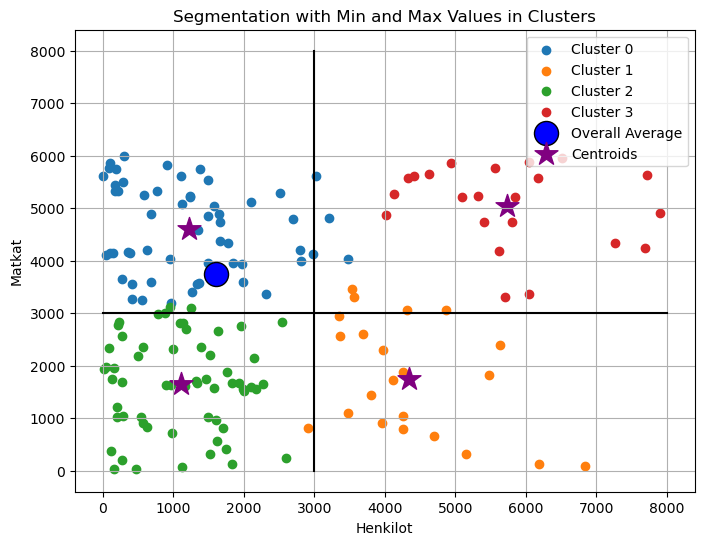

In [610]:

#Average of y
average_x = (max_cluster_2_y + min_cluster_1_y) / 2

#Average of y
average_y = (max_cluster_1_y + min_cluster_3_x) / 2

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the clusters
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Visualise the average point
plt.scatter(average_x, average_y, 
            color='blue', s=300, label='Overall Average', edgecolors='black', zorder=5)

# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Segmentation with Min and Max Values in Clusters')
plt.plot([3000, 3000], [0, 8000], color='black')
plt.plot([0, 8000], [3000, 3000], color='black')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



Cluster 0:
  X-Axis -> Min: 1, Max: 3483, Avg: 1218.57
  Y-Axis -> Min: 3195, Max: 5996, Avg: 4605.14
  Size: 56 points

Cluster 1:
  X-Axis -> Min: 2905, Max: 6838, Avg: 4350.45
  Y-Axis -> Min: 85, Max: 3463, Avg: 1746.68
  Size: 22 points

Cluster 2:
  X-Axis -> Min: 9, Max: 2598, Avg: 1105.17
  Y-Axis -> Min: 29, Max: 3120, Avg: 1646.65
  Size: 60 points

Cluster 3:
  X-Axis -> Min: 4022, Max: 7908, Avg: 5736.41
  Y-Axis -> Min: 3315, Max: 5949, Avg: 5051.45
  Size: 22 points



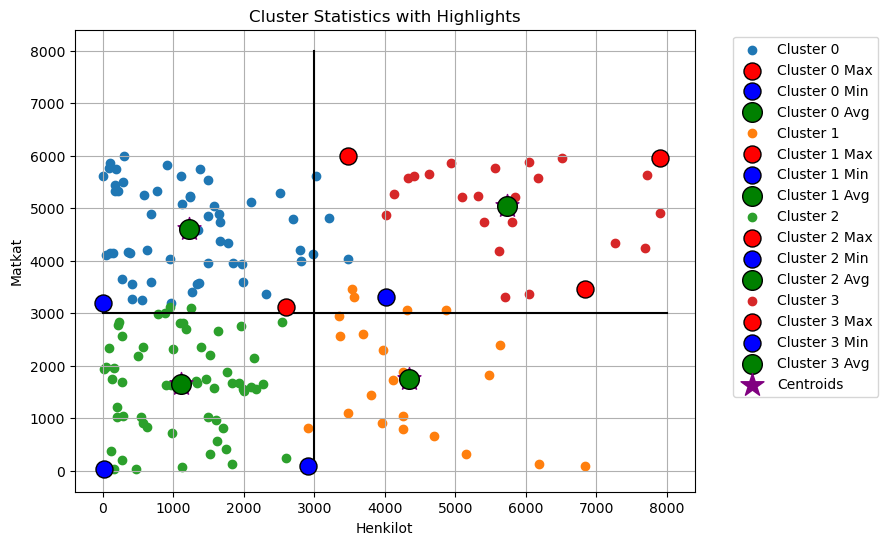

In [628]:
# Calculate statistics for each cluster
cluster_stats = {}
for cluster in np.unique(clusters):
    cluster_data = df[df['Cluster'] == cluster]
    cluster_stats[cluster] = {
        "min_x": cluster_data['Henkilot'].min(),
        "max_x": cluster_data['Henkilot'].max(),
        "avg_x": cluster_data['Henkilot'].mean(),
        "min_y": cluster_data['Matkat'].min(),
        "max_y": cluster_data['Matkat'].max(),
        "avg_y": cluster_data['Matkat'].mean(),
        "count": len(cluster_data)
    }

# Display statistics
for cluster, stats in cluster_stats.items():
    print(f"Cluster {cluster}:")
    print(f"  X-Axis -> Min: {stats['min_x']}, Max: {stats['max_x']}, Avg: {stats['avg_x']:.2f}")
    print(f"  Y-Axis -> Min: {stats['min_y']}, Max: {stats['max_y']}, Avg: {stats['avg_y']:.2f}")
    print(f"  Size: {stats['count']} points\n")


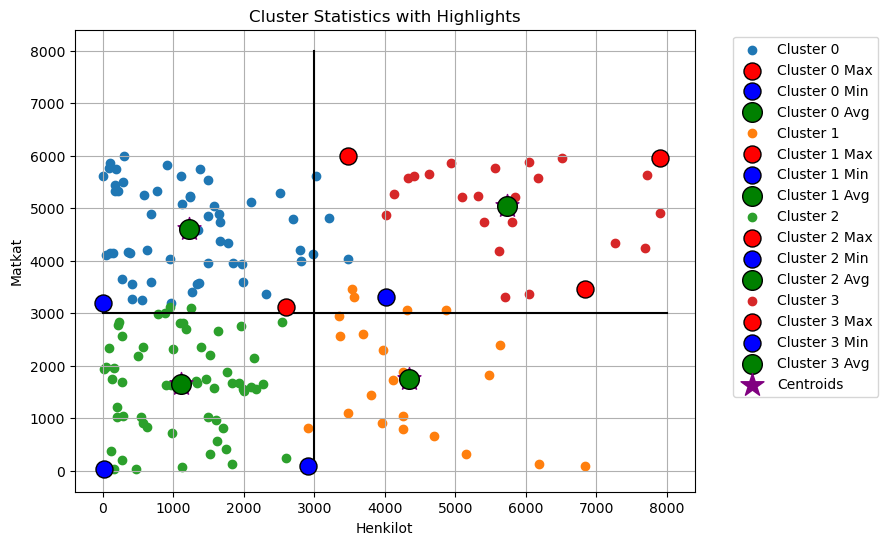

In [626]:
# Plot with highlights for max, min, and averages
plt.figure(figsize=(8, 6))

for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

    # Highlight max, min, and avg points
    stats = cluster_stats[cluster]
    plt.scatter(stats['max_x'], stats['max_y'], color='red', label=f'Cluster {cluster} Max', s=150, edgecolor='black', zorder=5)
    plt.scatter(stats['min_x'], stats['min_y'], color='blue', label=f'Cluster {cluster} Min', s=150, edgecolor='black', zorder=5)
    plt.scatter(stats['avg_x'], stats['avg_y'], color='green', label=f'Cluster {cluster} Avg', s=200, edgecolor='black', zorder=5)

# Add centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, legend, and grid
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Cluster Statistics with Highlights')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot([3000, 3000], [0, 8000], color='black')
plt.plot([0, 8000], [3000, 3000], color='black')
plt.grid(True)
plt.show()


Cluster 0:
  X-Axis -> Min: 1, Max: 3483, Avg: 1218.57
  Y-Axis -> Min: 3195, Max: 5996, Avg: 4605.14
  Size: 56 points

Cluster 1:
  X-Axis -> Min: 2905, Max: 6838, Avg: 4350.45
  Y-Axis -> Min: 85, Max: 3463, Avg: 1746.68
  Size: 22 points

Cluster 2:
  X-Axis -> Min: 9, Max: 2598, Avg: 1105.17
  Y-Axis -> Min: 29, Max: 3120, Avg: 1646.65
  Size: 60 points

Cluster 3:
  X-Axis -> Min: 4022, Max: 7908, Avg: 5736.41
  Y-Axis -> Min: 3315, Max: 5949, Avg: 5051.45
  Size: 22 points



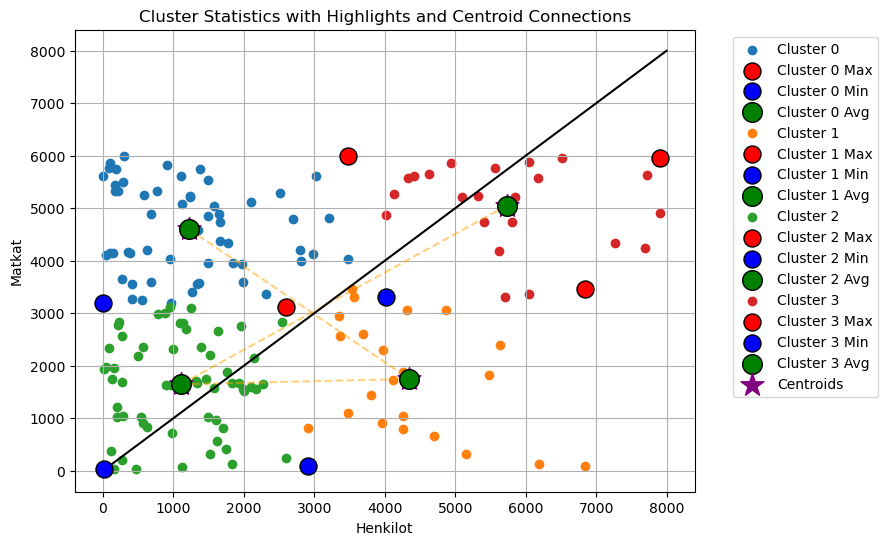

In [622]:
# Calculate statistics for each cluster
cluster_stats = {}
for cluster in np.unique(clusters):
    cluster_data = df[df['Cluster'] == cluster]
    cluster_stats[cluster] = {
        "min_x": cluster_data['Henkilot'].min(),
        "max_x": cluster_data['Henkilot'].max(),
        "avg_x": cluster_data['Henkilot'].mean(),
        "min_y": cluster_data['Matkat'].min(),
        "max_y": cluster_data['Matkat'].max(),
        "avg_y": cluster_data['Matkat'].mean(),
        "count": len(cluster_data)
    }

# Display statistics
for cluster, stats in cluster_stats.items():
    print(f"Cluster {cluster}:")
    print(f"  X-Axis -> Min: {stats['min_x']}, Max: {stats['max_x']}, Avg: {stats['avg_x']:.2f}")
    print(f"  Y-Axis -> Min: {stats['min_y']}, Max: {stats['max_y']}, Avg: {stats['avg_y']:.2f}")
    print(f"  Size: {stats['count']} points\n")

# Plot with highlights for max, min, and averages
plt.figure(figsize=(8, 6))

# Loop to plot each cluster and highlight min, max, and avg points
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

    # Highlight max, min, and avg points
    stats = cluster_stats[cluster]
    plt.scatter(stats['max_x'], stats['max_y'], color='red', label=f'Cluster {cluster} Max', s=150, edgecolor='black', zorder=5)
    plt.scatter(stats['min_x'], stats['min_y'], color='blue', label=f'Cluster {cluster} Min', s=150, edgecolor='black', zorder=5)
    plt.scatter(stats['avg_x'], stats['avg_y'], color='green', label=f'Cluster {cluster} Avg', s=200, edgecolor='black', zorder=5)

# Draw lines connecting centroids
for i in range(len(boundaries) - 1):
    plt.plot([boundaries[i, 0], boundaries[i + 1, 0]], [boundaries[i, 1], boundaries[i + 1, 1]], color='orange', linestyle='--', alpha=0.5)

# Add centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='purple', marker='*', label='Centroids')

# Add labels, legend, and grid
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Cluster Statistics with Highlights and Centroid Connections')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot([0, 8000], [0, 8000], color='black')  # Draw axes for clarity
plt.grid(True)
plt.show()


In [786]:
# Calculate statistics for each cluster

min0_y = df[df['Cluster'] == 0]['Matkat'].min()
min3_y = df[df['Cluster'] == 3]['Matkat'].min()
min_0_3_y = min(min0_y, min3_y)
print(min_0_3_y)

max2_y = df[df['Cluster'] == 2]['Matkat'].max()
max1_y = df[df['Cluster'] == 1]['Matkat'].max()
max_2_1_y = max(max2_y, max1_y)
print(max_2_1_y)

min3_x = df[df['Cluster'] == 3]['Henkilot'].min()
min1_x = df[df['Cluster'] == 1]['Henkilot'].min()
min_3_1_x = min(min3_x, min1_x)
print(min_3_1_x)

max0_x = df[df['Cluster'] == 0]['Henkilot'].max()
max2_x = df[df['Cluster'] == 2]['Henkilot'].max()
max_0_2_x = max(max0_x, max2_x)
print(max_0_2_x)






3195
3463
2905
3483


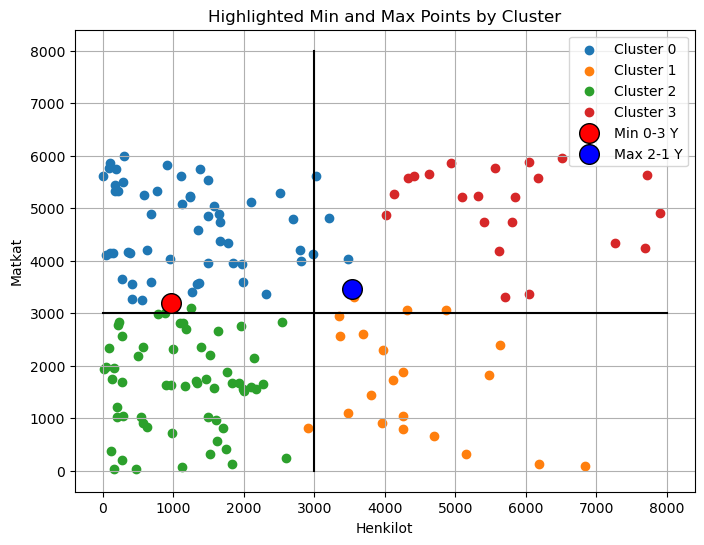

In [812]:
## Plot the MAX and Min points

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Highlight calculated points
plt.scatter(min_0_3_y_position['Henkilot'], min_0_3_y_position['Matkat'], color='red', s=200, label='Min 0-3 Y', edgecolor='black', zorder=5)
plt.scatter(max_2_1_y_position['Henkilot'], max_2_1_y_position['Matkat'], color='blue', s=200, label='Max 2-1 Y', edgecolor='black', zorder=5)
plt.scatter(min_3_1_x_position['Henkilot'], min_3_1_x_position['Matkat'], color='green', s=200, label='Min 3-1 X', edgecolor='black', zorder=5)
plt.scatter(max_0_2_x_position['Henkilot'], max_0_2_x_position['Matkat'], color='purple', s=200, label='Max 0-2 X', edgecolor='black', zorder=5

# Add labels and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Highlighted Min and Max Points by Cluster')
plt.plot([3000, 3000], [0, 8000], color='black')
plt.plot([0, 8000], [3000, 3000], color='black')
plt.legend()
plt.grid(True)
plt.show()



3329.0


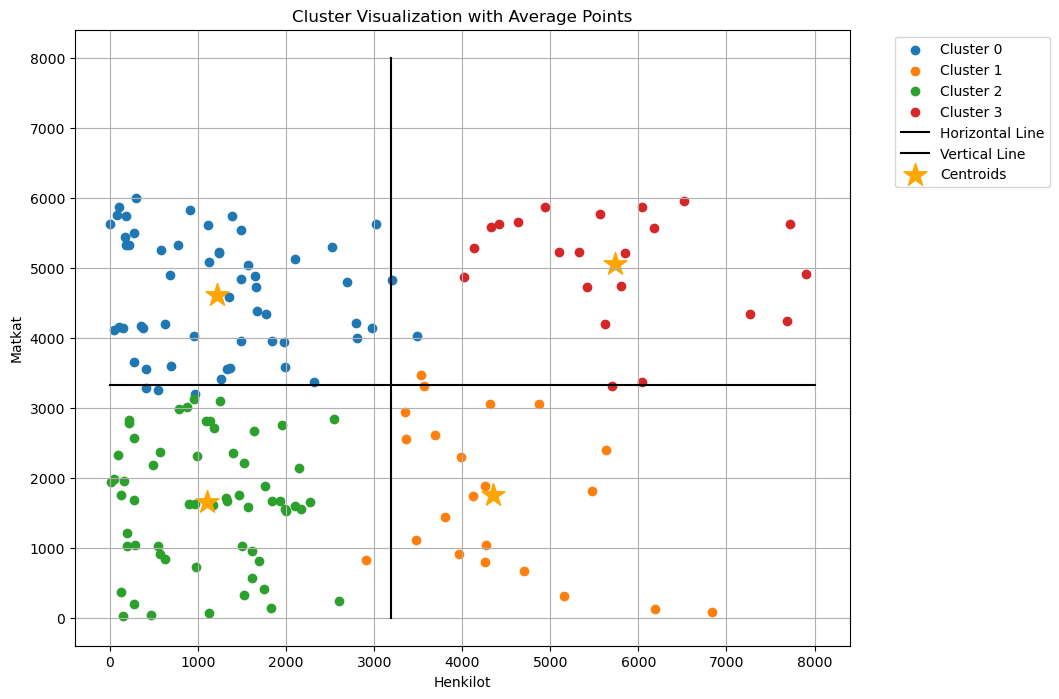

In [840]:
# Calculate the averages
avg_y = (min_0_3_y + max_2_1_y) / 2
print(avg_y)
avg_x = (min_3_1_x + max_0_2_x) / 2

# Plot clusters
plt.figure(figsize=(10, 8))
for cluster in np.unique(clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Henkilot'], cluster_points['Matkat'], label=f'Cluster {cluster}')

# Highlight average points
#plt.scatter(0,avg_y , color='purple', s=250, label='Average Point of min_0_3_y, max_2_1_y', edgecolor='black', zorder=5)
            
#plt.scatter (avg_x, 0, color='gold', s=250, label='Average Point of min_3_1_x, max_0_2_x ', edgecolor='black', zorder=5)

# PLot the horizontal and vertical lines to connect all the highlighted points
plt.plot([0,8000], [avg_y, avg_y], color='black', linestyle='-', label='Horizontal Line')
plt.plot([avg_x, avg_x], [0,8000], color='black', linestyle='-', label='Vertical Line')


# Centroids
plt.scatter(boundaries[:, 0], boundaries[:, 1], s=300, c='orange', marker='*', label='Centroids')

# Add labels, title, and legend
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Cluster Visualization with Average Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the plot
plt.show()

################ Lähetä tämä Tuukalle 


--- Predictions for Cluster 0 ---
Mean Squared Error: 674600.79
R² Score: -0.02


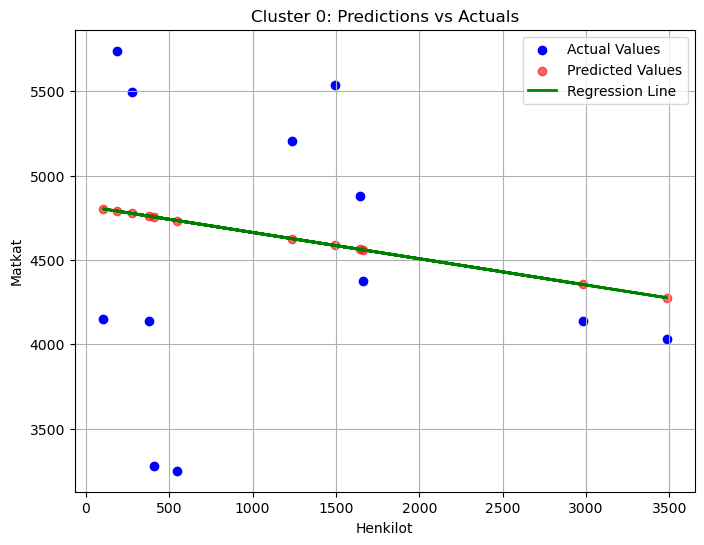

In [756]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Filter data for Cluster 0
cluster_0_data = df[df['Cluster'] == 0]  # Ensure 'Cluster' colum exists and is assigned correctly 


# Features and target
X = cluster_0_data[['Henkilot']]  
y = cluster_0_data['Matkat']      

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Predictions for Cluster 0 ---")  #is this correct?????????
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.plot(X_test, model.predict(X_test), color='green', linewidth=2, label='Regression Line')
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Cluster 0: Predictions vs Actuals')
plt.legend()
plt.grid(True)
plt.show()



--- Predictions for Cluster 1 ---
Mean Squared Error: 627250.13
R² Score: 0.35


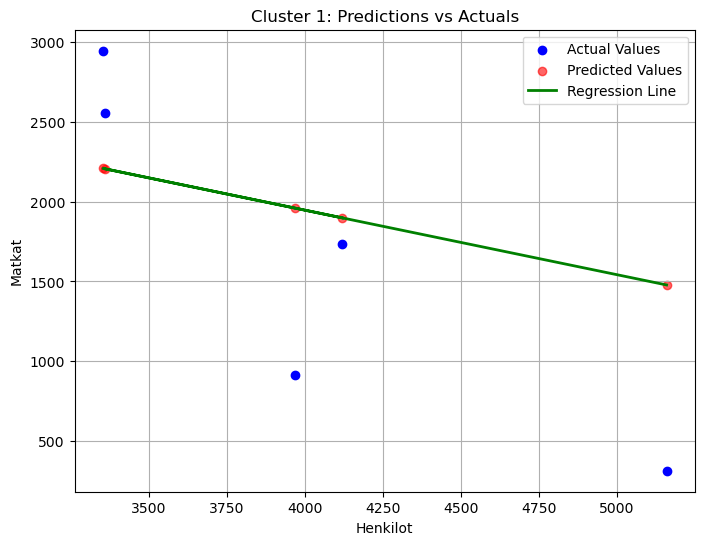

In [760]:
# Filter data for Cluster 1
cluster_1_data = df[df['Cluster'] == 1]  # Ensure 'Cluster' colum exists and is assigned correctly 


# Define features and target
X = cluster_1_data[['Henkilot']]  
y = cluster_1_data['Matkat']      

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Predictions for Cluster 1 ---")  #is this correct?????????
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='ActualDoodlebug15 Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.plot(X_test, model.predict(X_test), color='green', linewidth=2, label='Regression Line')
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Cluster 1: Predictions vs Actuals')
plt.legend()
plt.grid(True)
plt.show()



--- Predictions for Cluster 2 ---
Mean Squared Error: 891175.67
R² Score: -0.28


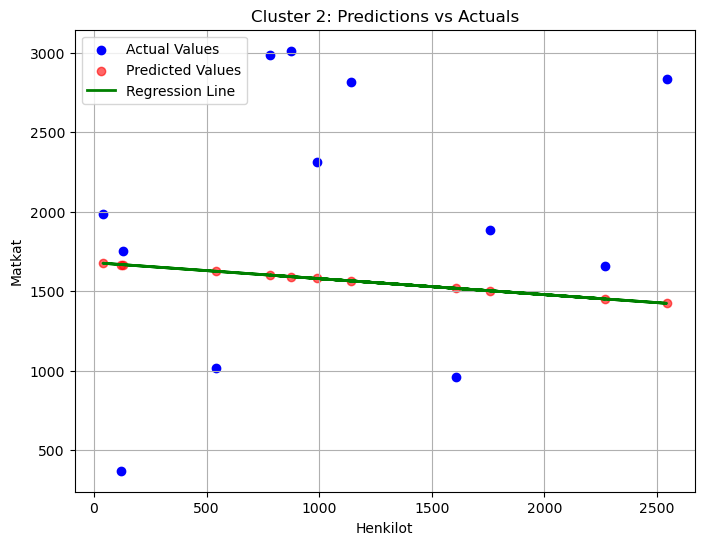

In [762]:
# Filter data for Cluster 2
cluster_2_data = df[df['Cluster'] == 2]  # Ensure 'Cluster' colum exists and is assigned correctly 

# Features and target
X = cluster_2_data[['Henkilot']]  
y = cluster_2_data['Matkat']      

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the LinearRegression to train the model 
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluatte the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Predictions for Cluster 2 ---")  
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.plot(X_test, model.predict(X_test), color='green', linewidth=2, label='Regression Line')
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Cluster 2: Predictions vs Actuals')
plt.legend()
plt.grid(True)
plt.show()



--- Predictions for Cluster 2 ---
Mean Squared Error: 1510448.61
R² Score: -0.30


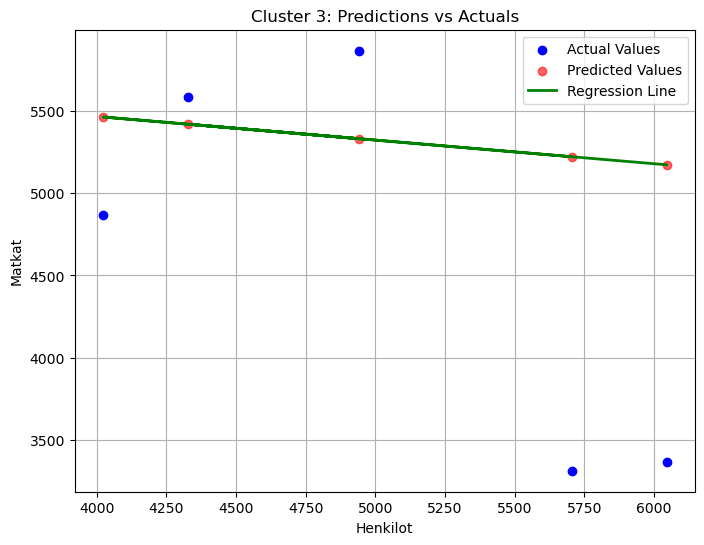

In [764]:
# Filter data for Cluster 3
cluster_3_data = df[df['Cluster'] == 3]  # Ensure 'Cluster' colum exists and is assigned correctly 

# Features and target
X = cluster_3_data[['Henkilot']]  
y = cluster_3_data['Matkat']      

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the LinearRegression to train the model 
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluatte the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Predictions for Cluster 2 ---")  
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.plot(X_test, model.predict(X_test), color='green', linewidth=2, label='Regression Line')
plt.xlabel('Henkilot')
plt.ylabel('Matkat')
plt.title('Cluster 3: Predictions vs Actuals')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#